## Семинар 1: Word Embeddings

В этом семинаре мы будем работать с эмбеддингами слов. Разберемся, откуда их брать, что они из себя представляют и как их визуализировать.

Для начала скачаем датасет. Он содержит полмиллиона вопросов с форума Quora.

In [ ]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

In [ ]:
import numpy as np

data = list(open("./quora.txt"))
data[50]

### Токенизация

Токенизация - это деление текста на токены (в простейшем случае отдельные слова). Этот шаг очень важен, так как определяет словарь, с которым предстоит работать модели. В данном семинаре мы воспользуемся простейшим способом токенизации - отделением слов от всего остального. Как мы узнаем дальше в курсе, существуют куда более продвинутые способы токенизации.

Токенизацию проще всего реализовать с помощью [регулярных выражений](https://docs.python.org/3/library/re.html). Но можно и без них.

In [ ]:
import re
from string import punctuation
punctuation

In [ ]:
# this two functions do the same job

def tokenize(text):
    for p in punctuation:
        text = text.replace(p, ' ')

    text = text.strip().split()
    return text

def tokenize(text):
    reg = re.compile(r'\w+')
    return reg.findall(text)

In [ ]:
print(tokenize(data[50]))

__`nltk`__ - это огромная библиотека для работы с текстом (сравнимо с `numpy` для матриц). В ней реализованы методы для [токенизации](https://www.nltk.org/api/nltk.tokenize.html), [лемматизации](https://www.nltk.org/api/nltk.stem.wordnet.html), [стемминга](https://www.nltk.org/api/nltk.stem.html) и многого другого. 

In [ ]:
from nltk.tokenize import wordpunct_tokenize

print(wordpunct_tokenize(data[50]))

Приведите все к нижнему регистру и токенизуйте.

In [ ]:
data_tok = # YOUR CODE

In [ ]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [ ]:
print(data_tok[:2])

### Word Embeddings

Способов получить эмбеддинги слов существует бесчисленное количество. Какие вы помните?
Каждый из них имеет свои плюсы и минусы, поэтому выбирать всегда непросто. Мы воспользуемся методом `Word2Vec`. Его можно импортировать из библиотеки [`gensim`](https://radimrehurek.com/gensim/auto_examples/). Это еще одна большая библиотека для работы с текстом, которая будет часто нам пригождаться.

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,   # embedding vector size
                 min_count=5,      # consider words that occured at least 5 times
                 window=5).wv      # define context as a 5-word window around the target word

In [ ]:
# now you can get word vectors!
model.get_vector('word')

In [ ]:
# or find similar words directly!
model.most_similar('word')

Вместо обучения эмбеддингов с нуля каждый раз, мы можем скачать уже готовые векторы, которые были получены на гигабайтах текстовых данных. Обучение эмбеддингов часто занимает кучу времени, поэтому на практике почти всегда проще взять предобученные.

Например, на постах из ~~twitter~~ X.

In [ ]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

Оказывается, что полученные векторные представления имеют линейрую структуру!

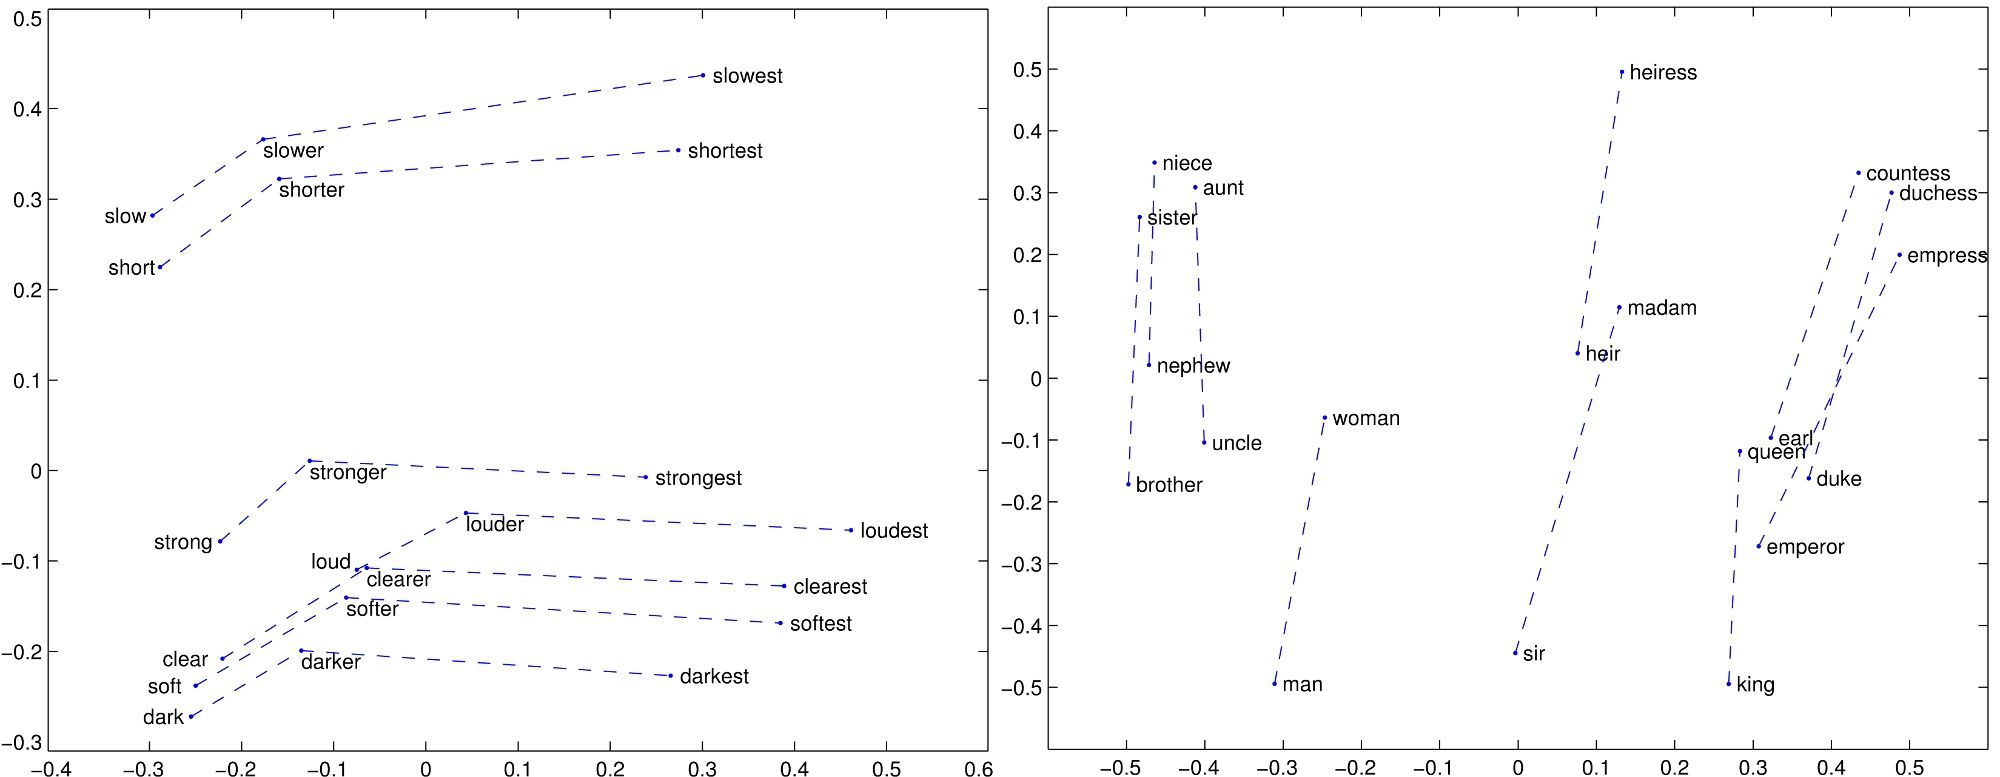

In [ ]:
model.most_similar(positive=["woman", "king"], negative=["man"])

In [ ]:
model.most_similar(positive=["latte", "water"], negative=["milk"])

In [ ]:
model.most_similar(positive=['head', 'sock'], negative=['foot'])

### Визуализация эмбеддингов

Для того, чтобы удобно посмотреть на эмбеддинги, можно их нарисовать на плоскости. Но для этого надо сперва понизить размерность пространства до 2 или 3. Для этого существуют специальные методы. Мы рассмотрим `PCA` и `t-SNE`.

Будем работать с 1000 самых популярных слов.

In [ ]:
words = model.index_to_key[:1000]

print(words[::100])

In [ ]:
# for each word, compute it's vector with model
word_vectors = # your code here

In [ ]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (1000, 100)
assert np.isfinite(word_vectors).all()

#### Метод главных компонент ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis))

Метод главных компонент используется для уменьшения размерности матрицы с сохранением максимального количества информации (дисперсии данных). В геометрическом смысле метод находит оси, по которым данные больше всего изменяются.

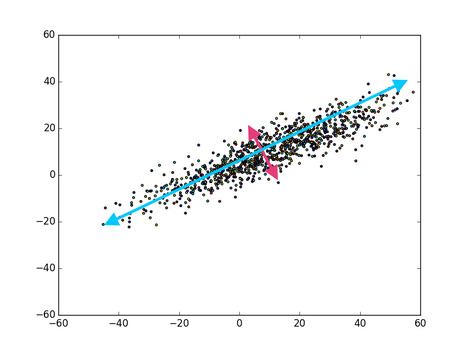


При нахождении данных осей решается такая оптимизационная задача:
<!-- Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_: -->

$$\|X W W^T - X\|^2_2 \to \underset{W}{\min}$$
- $X \in \mathbb{R}^{n \times m}$ - **центрированная** исходная матрица;
- $W \in \mathbb{R}^{m \times d}$ - матрица проекции;
- $n$ - число объектов, $m$ - число признаков и $d$ - желаемая размерность;

Из курса линейной алгебры и МО-2 вы должны знать, что решение для данной задачи можно найти с помощью SVD разложения.

$$ X = U\Sigma V^T$$
$$ W = V_d; $$


In [ ]:
from sklearn.decomposition import PCA

# PCA from sklearn center the data automatically
word_vectors_pca = PCA(n_components=2).fit_transform(word_vectors)

In [ ]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"

Эта функция строит интерактивный график. Наведя курсор на точки, можно посмотреть, какие слова им соответствуют!

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

### t-SNE

PCA позволяет уменьшать размерность, однако полученные представления являются лишь проекцией данных на плоскость. Они улавливают только верхнеуровневые зависимости и поэтому являются не самыми подходящими для визуализации.

Нам же хочется получить точки, которые напрямую отображают устройство многомерного пространства. Если конкретнее, мы хотим, чтобы точками, которые находятся рядом в многомерии, соответствовали близкие точки на плоскости. И наоборот, чем дальше точки в многомерии, тем дальше они должны быть на плоскости. Такую задачу как раз и решает t-SNE.
Подробнее можно почитать [тут](https://distill.pub/2016/misread-tsne/) и [тут](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

In [ ]:
from sklearn.manifold import TSNE

word_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(word_vectors)

In [ ]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

### Визуализация фраз

Конечно же, с помощью эмбеддингов слов можно аналогично визуализировать целые тексты. Надо только придумать, как из набора эмбеддингов сделать один фиксированной размерности. Предложите свой способ!

Проще всего будет взять среднее эмбеддингов по всем словам, но можно ли лучше?

In [ ]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros

    vector = np.zeros([model.vector_size], dtype='float32')
    
    # your code here
    
    return vector

In [ ]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]

# compute vectors for chosen phrases
phrase_vectors = np.array([get_phrase_embedding(phrase) for phrase in chosen_phrases])

In [ ]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [ ]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = TSNE(
    n_components=2, learning_rate='auto', init='random', perplexity=3
).fit_transform(phrase_vectors)

In [ ]:
draw_vectors(
    phrase_vectors_2d[:, 0],
    phrase_vectors_2d[:, 1],
    phrase=[phrase[:50] for phrase in chosen_phrases],
    radius=20
)

Теперь для каждого вопроса мы можем найти самые похожие на него среди всех остальных!

In [ ]:
# compute vector embedding for all lines in data
data_vectors = np.array([get_phrase_embedding(l) for l in data[:1000]])

In [ ]:
def find_nearest(query, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """
    
    # your code here
    
    return nearest

In [ ]:
find_nearest(query="How do i enter the matrix?", k=10)

In [ ]:
find_nearest(query="How does Trump?", k=10)

In [ ]:
find_nearest(query="Why don't i ask a question myself?", k=10)